In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
df = pd.read_csv(r"C:\Users\kyrie\ironhack\project8\cleanproject8.csv")
df

Unnamed: 0       Dates  Time      Lat      Lon    Base  month  \
0                0  2014-06-01     0  40.7293 -73.9920  B02512      6   
1                1  2014-06-01     0  40.7131 -74.0097  B02512      6   
2                2  2014-06-01     0  40.3461 -74.6610  B02512      6   
3                3  2014-06-01     0  40.7555 -73.9833  B02512      6   
4                4  2014-06-01     0  40.6880 -74.1831  B02512      6   
...            ...         ...   ...      ...      ...     ...    ...   
663839      663839  2014-06-30    22  40.7332 -73.9872  B02764      6   
663840      663840  2014-06-30    23  40.7905 -73.9796  B02764      6   
663841      663841  2014-06-30    23  40.7640 -73.9887  B02764      6   
663842      663842  2014-06-30    23  40.7262 -73.9944  B02764      6   
663843      663843  2014-06-30    23  40.7404 -73.9848  B02764      6   

       month_name  Day_of_month Day_name  Day_of_weeks   period  weekend?  
0            June             1   Sunday             6    night   weekend  
1            June             1   Sunday             6    night   weekend  
2            June             1   Sunday             6    night   weekend  
3            June             1   Sunday             6    night   weekend  
4            June             1   Sunday             6    night   weekend  
...           ...           ...      ...           ...      ...       ...  
663839       June            30   Monday             0  evening  workweek  
663840       June            30   Monday             0  evening  workweek  
663841       June            30   Monday             0  evening  workweek  
663842       June            30   Monday             0  evening  workweek  
663843       June            30   Monday             0  evening  workweek  

[663844 rows x 13 columns]

In [4]:
df.dtypes

Unnamed: 0        int64
Dates            object
Time              int64
Lat             float64
Lon             float64
Base             object
month             int64
month_name       object
Day_of_month      int64
Day_name         object
Day_of_weeks      int64
period           object
weekend?         object
dtype: object

In [5]:
dfml = df[['Lat','Lon']]
dfml

Lat      Lon
0       40.7293 -73.9920
1       40.7131 -74.0097
2       40.3461 -74.6610
3       40.7555 -73.9833
4       40.6880 -74.1831
...         ...      ...
663839  40.7332 -73.9872
663840  40.7905 -73.9796
663841  40.7640 -73.9887
663842  40.7262 -73.9944
663843  40.7404 -73.9848

[663844 rows x 2 columns]

In [6]:
#calling the libraries
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn import metrics
from yellowbrick.cluster import KElbowVisualizer
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer

In [7]:
#declaring the function to get the metrics from our model
def evaluation (X, labels):
    
    print("Silhouette Coefficient: ", metrics.silhouette_score(X, labels, metric="sqeuclidean"))
    print("Variance Ratio Criterion: ", metrics.calinski_harabasz_score(X, labels))

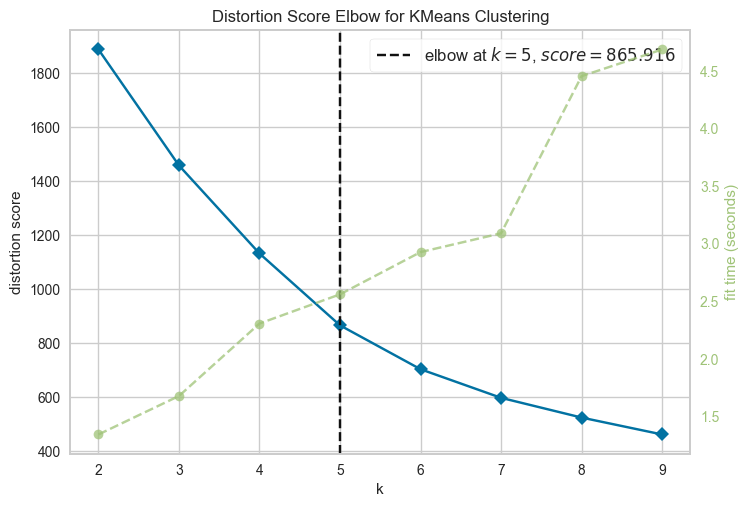

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [8]:
#Using KElbowVisualizer to get the optimal number of cluster for our model (Kmeans) - don't worry about the error warnings
model = KMeans()
visualizer = KElbowVisualizer(estimator = model, k = (2,10))
visualizer.fit(dfml)
visualizer.poof()

In [28]:
df1 = dfml.sample(10000)

In [29]:
df1.shape

(10000, 2)

In [30]:
#calling the model and fitting on our dataframe
kmeans = KMeans(n_clusters=5, random_state=0).fit(df1)
cluster_centers= kmeans.cluster_centers_
labels = kmeans.labels_

In [31]:
#calling the function to get our metrics
evaluation (df1, labels)

Silhouette Coefficient:  0.5228871520988623
Variance Ratio Criterion:  5749.37611633353


In [32]:
df1['kmeans_labels']= labels
df1.kmeans_labels.unique()

array([4, 2, 0, 1, 3])

In [33]:
df1

Lat      Lon  kmeans_labels
245978  40.7183 -74.0392              4
633531  40.7685 -73.8625              2
525455  40.7691 -73.9812              0
475237  40.7636 -73.9759              0
220411  40.7400 -73.9936              4
...         ...      ...            ...
570359  40.6444 -73.7818              1
473242  40.7619 -73.9774              0
1427    40.7543 -73.9739              0
330962  40.7691 -73.9632              0
620734  40.7472 -73.9767              0

[10000 rows x 3 columns]

In [34]:
import folium

In [35]:
data_map_list_cluster1 = df1[['Lat','Lon']][df1['kmeans_labels']==0].values.tolist()
data_map_list_cluster2 = df1[['Lat','Lon']][df1['kmeans_labels']==1].values.tolist()
data_map_list_cluster3 = df1[['Lat','Lon']][df1['kmeans_labels']==2].values.tolist()
data_map_list_cluster4 = df1[['Lat','Lon']][df1['kmeans_labels']==3].values.tolist()
data_map_list_cluster5 = df1[['Lat','Lon']][df1['kmeans_labels']==4].values.tolist()
size_map_list_1 = len(data_map_list_cluster1)
size_map_list_2 = len(data_map_list_cluster2)
size_map_list_3 = len(data_map_list_cluster3)
size_map_list_4 = len(data_map_list_cluster4)
size_map_list_5 = len(data_map_list_cluster5)


In [36]:
# Plotting a map with lcoations
map= folium.Map(location=[df1.Lat.mean(), df1.Lon.mean()], zoom_start=10,tiles = "Stamen Toner")

#first cluster
for point in range(0,size_map_list_1):
	folium.CircleMarker(data_map_list_cluster1[point], radius=2,color='blue',fill_color='lightblue',).add_to(map)

#second claster
for point in range(0,size_map_list_2):
	folium.CircleMarker(data_map_list_cluster2[point], radius=2,color='green',fill_color='lightgreen',).add_to(map)

#third claster
for point in range(0,size_map_list_3):
	folium.CircleMarker(data_map_list_cluster3[point], radius=2,color='purple',fill_color='purple',).add_to(map)

#fourth claster
for point in range(0,size_map_list_4):
	folium.CircleMarker(data_map_list_cluster4[point], radius=2,color='orange',fill_color='orange',).add_to(map)

#fifth claster
for point in range(0,size_map_list_5):
	folium.CircleMarker(data_map_list_cluster5[point], radius=2,color='red',fill_color='red',).add_to(map)

In [37]:
map